# 在线性回归采用梯度下降优化
在这一节，我们试试怎么用我们的梯度下降，解决一个线性回归的问题

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 首先我们造一些点出来
# 设定一个随机种子，保证我们每次得到的结果一致
np.random.seed(666)
x = 2. * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

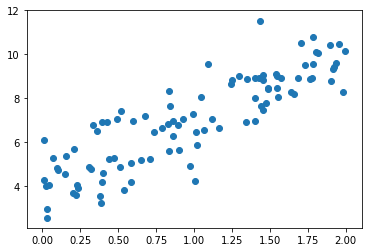

In [3]:
plt.scatter(x, y)
plt.show()

## 开始使用我们的梯度下降
线性回归的损失函数：
$$J(\theta)=\text{MSE}(y, \hat{y})=\frac{1}{m} \sum_{i=1}^{m}\left(y^{(i)}-\hat{y}^{(i)}\right)^{2}$$
 
损失函数的求导形式：
$$\nabla J(\theta)=\left( 
\begin{array}{c}
{\displaystyle \frac{\partial J}{\partial \theta_{0}}} \\ 
{\displaystyle \frac{\partial J}{\partial \theta_{1}}} \\ 
{\displaystyle \frac{\partial J}{\partial \theta_{2}}} \\ 
{\cdots} \\ 
{\displaystyle \frac{\partial J}{\partial \theta_{n}}}
\end{array}\right)
=\frac{2}{m} \cdot \left( \begin{array}{c}
{\displaystyle \sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right)} \\ 
{\displaystyle \sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{1}^{(i)}} \\ 
{\displaystyle \sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{2}^{(i)}} \\ 
{\ldots} \\ 
\displaystyle \sum_{i=1}^{m}\left(X_{b}^{(i)} \boldsymbol{\theta}-y^{(i)}\right) \cdot X_{n}^{(i)}
\end{array}\right)$$

In [4]:
# 还记得线性回归的损失函数吗？
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')

In [5]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    
    return res * 2 / len(X_b)

In [6]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

In [7]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1,1)])
X_b[:10]

array([[1.        , 1.40087424],
       [1.        , 1.68837329],
       [1.        , 1.35302867],
       [1.        , 1.45571611],
       [1.        , 1.90291591],
       [1.        , 0.02540639],
       [1.        , 0.8271754 ],
       [1.        , 0.09762559],
       [1.        , 0.19985712],
       [1.        , 1.01613261]])

In [8]:
initial_theta = np.zeros(X_b.shape[1])
initial_theta

array([0., 0.])

In [9]:
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)
# 最终求得了参数和解决
theta

array([4.02145786, 3.00706277])

## 我们再对比一下sklearn中的线性回归

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_b, y)
lr.coef_

array([0.        , 3.00517447])

In [11]:
lr.intercept_

4.023696672103901